# Validación del modelo de Reconocimiento Facial
En estas pruebas se busca validar la tasa de precisión del modelo a utilizar *dlib_face_recognition_resnet_model_v1* a través del framework *face_recognition* el cuál nos otorga funciones para localizar rostros en un fotograma así como extraer 128 valores carácterísticos de cada uno para después compararlos a los de una base de datos dada por un usuario y verificar si los rostros encontrados coinciden con alguno de dicha base.

## Librerías

In [3]:
import cv2
import os
import face_recognition
from sklearn import metrics
import matplotlib.pyplot as plt
import pandas as pd

## Extracción de los encodings de los sujetos y guardarlos en un vector
En esta base de datos de prueba contamos con las fotos de cuatro sujetos (Ariadna, Daniel, Frida y Guillermo), esta base de datos está dividida en dos: 

* *sujetos* : consta de una foto de cada sujeto.
* *dataset_sujetos*: consta con 50 fotos de cada sujeto clasificadas por sujeto. Para este dataset, tomamos fotografías de los sujetos en diferentes escenarios:

| |Con lentes|Sin lentes|
|---|---|---|
|Con iluminación alta| 10 | 10 |
|Con iluminación baja| 10 | 10 |
|En un escritorio | | |

En esta parte extraemos los encodings (128 características) de cada sujeto que utiliza el modelo para realizar el reconocimiento y los almacenamos en un vector. 

Nota: para este proceso de extracción de encodings y almacenamiento, normalmente se guardan los encodings en un archivo de texto (.txt) para poder acceder de forma más efectiva.

In [4]:
# Vectores que almacenarán las características de los rostros encontrados
sujetos_encodings = []
sujetos_names = []

sujetos_path = os.path.join(os.getcwd(), 'sujetos')  # Usa os.getcwd() para obtener el directorio de trabajo actual
sujetos_path = sujetos_path.replace("\\", "/")

for image_name in os.listdir(sujetos_path):
    img = cv2.imread("sujetos/"+ image_name)
    face_locations = face_recognition.face_locations(img)[0] # Obtiene las coordenadas del rostro en la imagen
    face_encodings = face_recognition.face_encodings(img, known_face_locations=[face_locations])[0] # Obtenemos las características del rostro encontrado
    sujetos_encodings.append(face_encodings)
    sujetos_names.append(image_name.split(".")[0])

print("Sujetos encontrados: ", sujetos_names)
print("Características de los sujetos: ", sujetos_encodings)

Sujetos encontrados:  ['ariadna', 'daniel', 'frida', 'guillermo']
Características de los sujetos:  [array([-4.43450622e-02,  1.11018814e-01,  5.01114838e-02, -8.61894563e-02,
       -6.50194436e-02, -2.57590450e-02, -7.58145563e-03, -5.26424199e-02,
        1.99669063e-01, -8.51735398e-02,  3.12555104e-01, -1.22164860e-01,
       -2.81602800e-01,  4.49467413e-02,  1.81418210e-02,  1.41228691e-01,
       -1.64879337e-01, -3.63382511e-02, -8.86298791e-02,  6.95924386e-02,
        4.85856719e-02, -2.36514974e-02,  8.24610069e-02,  1.01719745e-01,
       -8.19467157e-02, -3.92638654e-01, -7.87886307e-02, -9.14495438e-02,
       -3.97187844e-02, -9.07428414e-02, -7.07499534e-02,  5.64187393e-02,
       -1.11530319e-01, -5.80246113e-02, -3.21706459e-02,  2.19555665e-03,
       -1.06326118e-01, -1.21103674e-01,  2.35986635e-01, -1.82750896e-02,
       -3.02343994e-01, -3.09282690e-02,  5.73494509e-02,  1.90621004e-01,
        1.96314633e-01,  9.59377550e-03,  7.89942220e-04, -8.32018927e-02,


## Prueba de reconocimiento
Una vez tenemos los encodings de los sujetos, procedemos a evaluar el rendimiento del modelo utilizado, esto aplicando el reconocimiento facial en cada imagen para comprobar que verdaderamente se trata del sujeto.

In [8]:
datset_path = os.path.join(os.getcwd(), 'dataset_sujetos')  # Para obtener el directorio de trabajo del dataset
datset_path = datset_path.replace("\\", "/")

Realizamos un preprocesamiento en donde revisamos que las imágenes estén nombradas con un nombre estratégico (enumeración del 0 al 49) para poder hacer debugging en caso de ser necesario.

In [59]:
# Iterar sobre todos los archivos en el directorio
for folder in os.listdir(datset_path):
    folder_path = os.path.join(datset_path, folder)
    if os.path.isdir(folder_path):
        for index, image_name in enumerate(os.listdir(folder_path)):
            if image_name.endswith(".jpg"):
                new_image_name = f"{index}.jpg"
                # Construir las rutas completas para el archivo antiguo y el nuevo
                old_path = os.path.join(folder_path, image_name)
                new_path = os.path.join(folder_path, new_image_name)
                # Verificar si el nuevo nombre ya existe y ajustar si es necesario
                while os.path.exists(new_path):
                    index += 1
                    new_image_name = f"{index}.jpg"
                    new_path = os.path.join(folder_path, new_image_name)
                # Cambiar el nombre del archivo
                os.rename(old_path, new_path)
                print(f"Archivo renombrado: {image_name} -> {new_image_name}")
print("Dataset renombrado")

Archivo renombrado: 0.jpg -> 2.jpg
Archivo renombrado: 1.jpg -> 3.jpg
Archivo renombrado: 10.jpg -> 4.jpg
Archivo renombrado: 11.jpg -> 5.jpg
Archivo renombrado: 12.jpg -> 6.jpg
Archivo renombrado: 13.jpg -> 7.jpg
Archivo renombrado: 14.jpg -> 8.jpg
Archivo renombrado: 15.jpg -> 9.jpg
Archivo renombrado: 16.jpg -> 10.jpg
Archivo renombrado: 17.jpg -> 11.jpg
Archivo renombrado: 18.jpg -> 12.jpg
Archivo renombrado: 19.jpg -> 13.jpg
Archivo renombrado: 20.jpg -> 14.jpg
Archivo renombrado: 21.jpg -> 15.jpg
Archivo renombrado: 22.jpg -> 16.jpg
Archivo renombrado: 23.jpg -> 17.jpg
Archivo renombrado: 24.jpg -> 18.jpg
Archivo renombrado: 25.jpg -> 19.jpg
Archivo renombrado: 26.jpg -> 20.jpg
Archivo renombrado: 27.jpg -> 21.jpg
Archivo renombrado: 28.jpg -> 22.jpg
Archivo renombrado: 29.jpg -> 23.jpg
Archivo renombrado: 30.jpg -> 24.jpg
Archivo renombrado: 31.jpg -> 25.jpg
Archivo renombrado: 32.jpg -> 26.jpg
Archivo renombrado: 33.jpg -> 27.jpg
Archivo renombrado: 34.jpg -> 28.jpg
Archivo ren

Posteriormente se inicializa el vector con los valores reales (y_true).

Nota: utilizamos el vector de *_orden_img_* para supervisar que las imagenes están bien nombradas por carpeta.

Folder:  ariadna
Folder:  daniel
Folder:  frida
Folder:  guillermo
Tamano de las reales:  200
Etiquetas reales:  ['ariadna', 'ariadna', 'ariadna', 'ariadna', 'ariadna', 'ariadna', 'ariadna', 'ariadna', 'ariadna', 'ariadna', 'ariadna', 'ariadna', 'ariadna', 'ariadna', 'ariadna', 'ariadna', 'ariadna', 'ariadna', 'ariadna', 'ariadna', 'ariadna', 'ariadna', 'ariadna', 'ariadna', 'ariadna', 'ariadna', 'ariadna', 'ariadna', 'ariadna', 'ariadna', 'ariadna', 'ariadna', 'ariadna', 'ariadna', 'ariadna', 'ariadna', 'ariadna', 'ariadna', 'ariadna', 'ariadna', 'ariadna', 'ariadna', 'ariadna', 'ariadna', 'ariadna', 'ariadna', 'ariadna', 'ariadna', 'ariadna', 'ariadna', 'daniel', 'daniel', 'daniel', 'daniel', 'daniel', 'daniel', 'daniel', 'daniel', 'daniel', 'daniel', 'daniel', 'daniel', 'daniel', 'daniel', 'daniel', 'daniel', 'daniel', 'daniel', 'daniel', 'daniel', 'daniel', 'daniel', 'daniel', 'daniel', 'daniel', 'daniel', 'daniel', 'daniel', 'daniel', 'daniel', 'daniel', 'daniel', 'daniel', 'danie

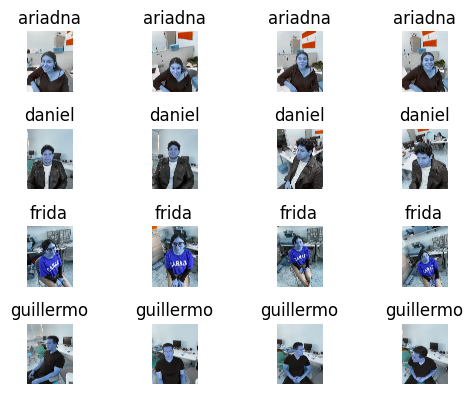

In [9]:
y_true = []
# orden_img = []
imgs_per_folder = 5
index = 1
index2 = 1
for folder in os.listdir(datset_path):
    print("Folder: ", folder)
    for image_name in os.listdir(datset_path + "/" + folder):
        y_true.append(folder)
        #orden_img.append(image_name)
        if index < imgs_per_folder:
            plt.subplot(5,imgs_per_folder,index2*imgs_per_folder+index)
            plt.imshow(cv2.imread(datset_path + "/" + folder + "/" + image_name))
            plt.title(folder)
            plt.axis('off')
            index+=1
    #print("Orden imagenes: ", orden_img)
    orden_img = []
    index2+=1
    index = 1
print("Tamano de las reales: ", len(y_true))  
print("Etiquetas reales: ", y_true)
plt.tight_layout()
plt.show()

En este apartado se realiza el reconocimiento facial de las imágenes del dataset y se busca obtener las etiquetas de las clasificaciones posibles de acuerdo a los siguientes casos:
* Reconocimiento Exitoso:
    * Nombre de los sujetos: ariadna, daniel, frida, guillermo.
* Detección fallida:
    * Detección de múltiples rostros en la imágen: MR.
    * No se detectó un rostro: NR.
    * Se detectó un rostro pero no se relaciona con los de ela base de datos: Desconocido.

las etiquetas obtenidas son almacenadas en el vector de predicciones *_y_pred_*.

Al mismo tiempo, para poder visualizar las detecciones realizadas por el modelo guardamos las imágenes con los cuadros dibujados de las detecciones de la siguiente manera:
* Detecciones Exitosas: se almacenan en la carpeta *_resultados_FR/*
* Detecciones Erroneas: se almacenan en la carpeta *_resultados_FR/errores_*

In [147]:
y_pred = [] # Etiquetas predichas
error = []  # Etiquetas erroneas
num_MR = 0  # Numero de multiples rostros
num_NR = 0  # Numero de no rostros
for folder in os.listdir(datset_path):
    print("Folder: ", folder)
    for image_name in os.listdir(datset_path + "/"+ folder):
            img = cv2.imread(datset_path + "/"+ folder +"/" + image_name)
            #print("Imagen: ", image_name)
            face_locations = face_recognition.face_locations(img)# Obtiene las coordenadas del rostro en la imagen
            if face_locations != []:
                #print("Detecciones", len(face_locations))
                face_encodings = face_recognition.face_encodings(img, face_locations) # Obtiene las características del rostro encontrado
                for face_encoding, (top, right, bottom, left) in zip(face_encodings, face_locations):
                    matches = face_recognition.compare_faces(sujetos_encodings, face_encoding)
                    if True in matches:
                        first_match_index = matches.index(True)
                        name = sujetos_names[first_match_index]
                    else:
                        name = "Desconocido"
                    cv2.rectangle(img, (left, top), (right, bottom), (0,255,0), 2) # Dibuja un rectángulo en la cara
                    cv2.putText(img, name, (left, top-10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0,255,0), 2)
                if len(face_locations) > 1: # Si se detectan mas de un rostro en la imagen
                    y_pred.append("MR") # Etiqueta de multiples rostros
                    cv2.imwrite("./resultados_FR/errores/"+folder+"_"+image_name, img) # Guarda la imagen en la carpeta de errores
                    num_MR += 1
                else:
                    y_pred.append(name) # Etiqueta del sujeto encontrado
                    cv2.imwrite("./resultados_FR/"+folder+"_"+image_name, img) # Guarda la imagen en la carpeta de resultados
            else:
                print("No se ha encontrado ningún rostro en la imagen: "+folder+"_"+image_name) # Si no se encuentra ningun rostro
                y_pred.append("NR")
                num_NR += 1
print("Predicciones finales: ", len(y_pred))
print("Numero de NR: ", num_NR)
print("Numero de MR: ", num_MR)

Folder:  ariadna
Folder:  daniel
Folder:  frida
No se ha encontrado ningún rostro en la imagen: frida_33.jpg
No se ha encontrado ningún rostro en la imagen: frida_8.jpg
Folder:  guillermo
No se ha encontrado ningún rostro en la imagen: guillermo_11.jpg
No se ha encontrado ningún rostro en la imagen: guillermo_16.jpg
No se ha encontrado ningún rostro en la imagen: guillermo_32.jpg
No se ha encontrado ningún rostro en la imagen: guillermo_4.jpg
No se ha encontrado ningún rostro en la imagen: guillermo_48.jpg
No se ha encontrado ningún rostro en la imagen: guillermo_6.jpg
No se ha encontrado ningún rostro en la imagen: guillermo_7.jpg
Predicciones finales:  200
Numero de NR:  9
Numero de MR:  16


## Visualización de los resultados obtenidos

In [148]:
datos = {'Valores Reales': y_true,'Valores Predichos': y_pred}
tabla = pd.DataFrame(datos)
print(tabla)

    Valores Reales Valores Predichos
0          ariadna           ariadna
1          ariadna           ariadna
2          ariadna           ariadna
3          ariadna           ariadna
4          ariadna           ariadna
..             ...               ...
195      guillermo         guillermo
196      guillermo                NR
197      guillermo                NR
198      guillermo                MR
199      guillermo         guillermo

[200 rows x 2 columns]


### Detecciones exitosas

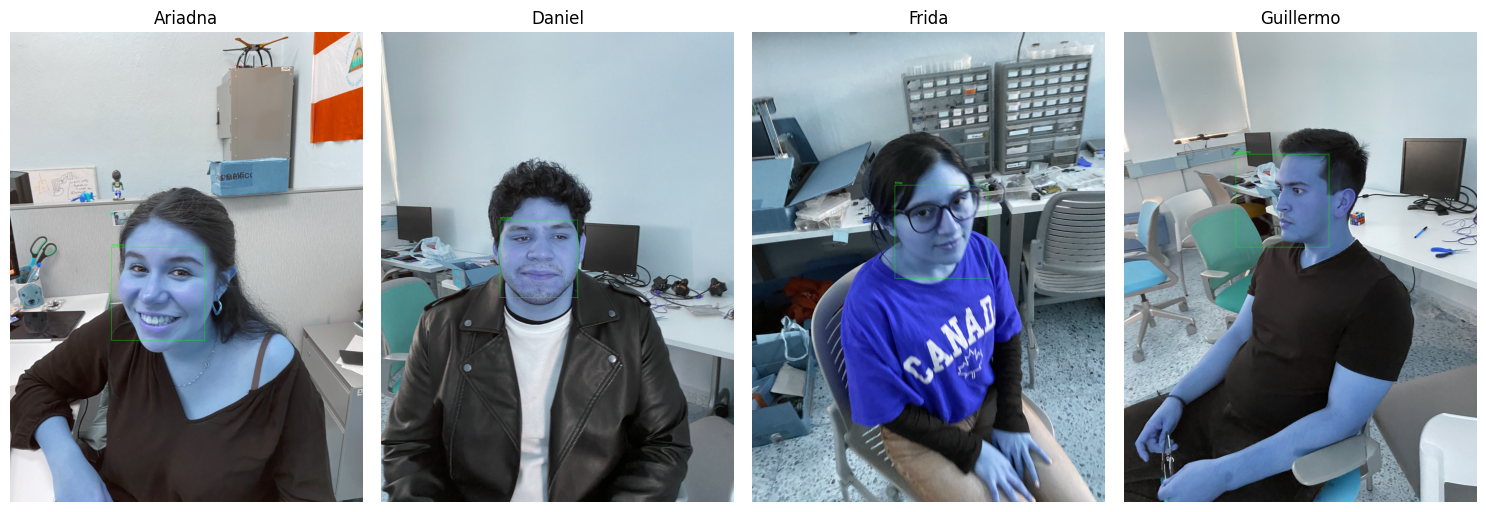

In [152]:
fig, axs = plt.subplots(1,4,figsize=(15,5))
axs[0].imshow(cv2.imread("./resultados_FR/ariadna_0.jpg"))
axs[0].set_title("Ariadna")
axs[0].axis('off')
axs[1].imshow(cv2.imread("./resultados_FR/daniel_0.jpg")) 
axs[1].set_title("Daniel")
axs[1].axis('off')
axs[2].imshow(cv2.imread("./resultados_FR/frida_0.jpg"))
axs[2].set_title("Frida")
axs[2].axis('off')
axs[3].imshow(cv2.imread("./resultados_FR/guillermo_0.jpg"))
axs[3].set_title("Guillermo")
axs[3].axis('off')

plt.tight_layout()
plt.show()

### Detecciones erroneas
En el siguiente caso tomamos una foto de las consideradas como detecciones erroneas. Se puede ver que en la imagen se detectan dos rostros aunque solo está una persona en el fotograma.

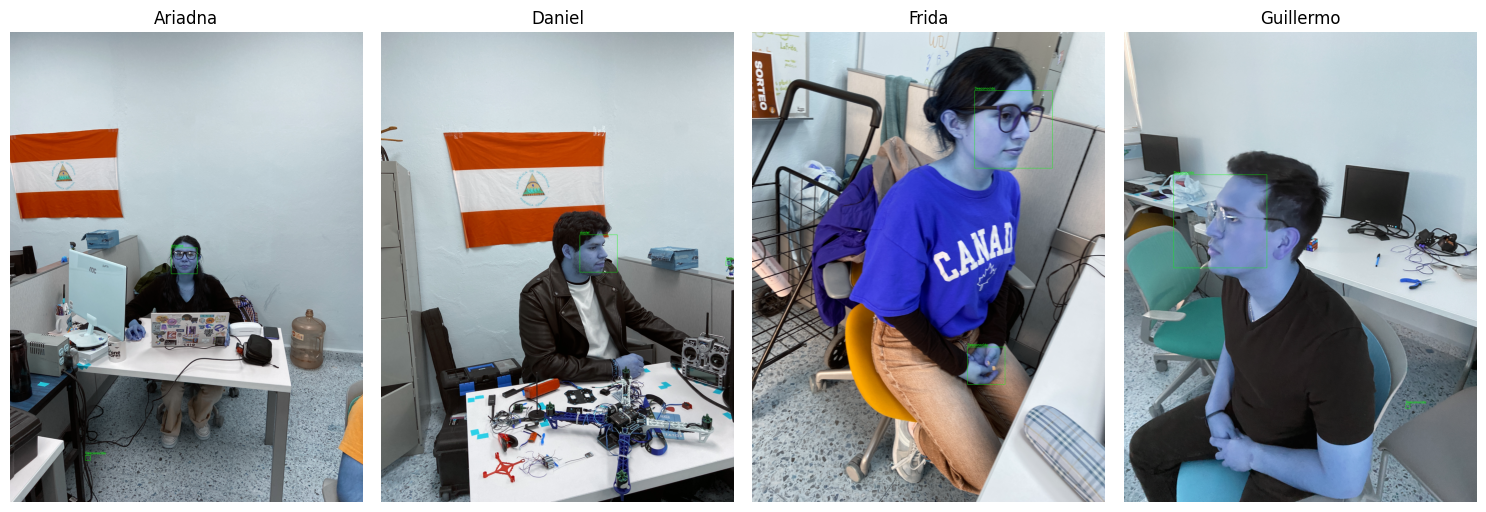

In [154]:
fig, axs = plt.subplots(1,4,figsize=(15,5))
axs[0].imshow(cv2.imread("./resultados_FR/errores/ariadna_0.jpg"))
axs[0].set_title("Ariadna")
axs[0].axis('off')
axs[1].imshow(cv2.imread("./resultados_FR/errores/daniel_23.jpg")) 
axs[1].set_title("Daniel")
axs[1].axis('off')
axs[2].imshow(cv2.imread("./resultados_FR/errores/frida_9.jpg"))
axs[2].set_title("Frida")
axs[2].axis('off')
axs[3].imshow(cv2.imread("./resultados_FR/errores/guillermo_12.jpg"))
axs[3].set_title("Guillermo")
axs[3].axis('off')

plt.tight_layout()
plt.show()

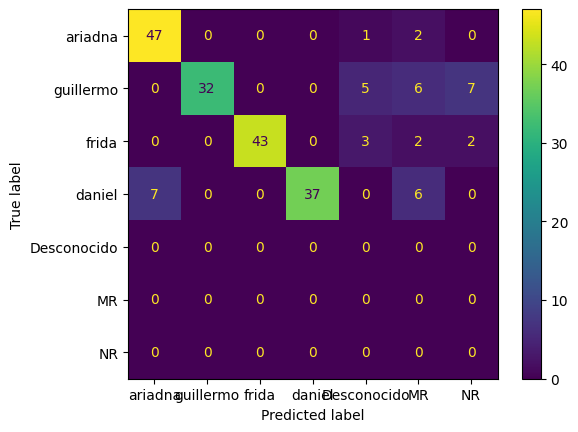

In [149]:
confusion_matrix = metrics.confusion_matrix(y_true, y_pred, labels=["ariadna","guillermo","frida","daniel","Desconocido", "MR","NR"])
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ["ariadna","guillermo","frida","daniel","Desconocido", "MR","NR"])
cm_display.plot()
plt.show()

### Métricas
Una de las métricas a evaluar es la cantidad de verdaderos positivos, esto gracias a una matriz de confusión.

Resultados con respecto a la detección de rostros

In [10]:
num_MR = 16
num_NR = 9
detection_accuracy = (len(y_true)-num_MR-num_NR)/len(y_true)
print("Detection Accuracy:", detection_accuracy)
detection_precision = (len(y_true)-num_MR-num_NR)/(len(y_true)+num_MR)
print("Detection Precision:", detection_precision)
detection_recall = (len(y_true)-num_MR-num_NR)/(len(y_true)+num_NR)
print("Detection Recall:", detection_recall)
detection_f1 = 2*(detection_precision*detection_recall)/(detection_precision+detection_recall)
print("Detection F1:", detection_f1)

Detection Accuracy: 0.875
Detection Precision: 0.8101851851851852
Detection Recall: 0.8373205741626795
Detection F1: 0.8235294117647058


In [150]:
#Se imprimen las variables obtenidas de la matríz
accuracy = metrics.accuracy_score(y_true, y_pred)
print('Accuracy:',accuracy)
precision = metrics.precision_score(y_true, y_pred, average='macro')
print("Precision:",precision)
recall = metrics.recall_score(y_true, y_pred, average='macro')
print("Recall:",recall)
fone = metrics.f1_score(y_true, y_pred, average='macro')
print('Fone:',fone)

Accuracy: 0.795
Precision: 0.5529100529100529
Recall: 0.4542857142857143
Fone: 0.49423426488051136


c:\Users\frida\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
